<a href="https://colab.research.google.com/github/Nahida58/NM-Neural/blob/main/mod2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
##imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
from tensorflow.keras.layers import Dense,Dropout

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [65]:
##import dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [66]:
print(f"Training images shape:{x_train.shape}")
print(f"Training labels shape:{y_train.shape}")
print(f"Test images shape:{x_test.shape}")
print(f"Test labels shape:{y_test.shape}")

Training images shape:(50000, 32, 32, 3)
Training labels shape:(50000, 1)
Test images shape:(10000, 32, 32, 3)
Test labels shape:(10000, 1)


In [67]:
NUM_CLASSES=10
classes=[
         'airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck'
]

In [68]:
plt.style.use('dark_background')

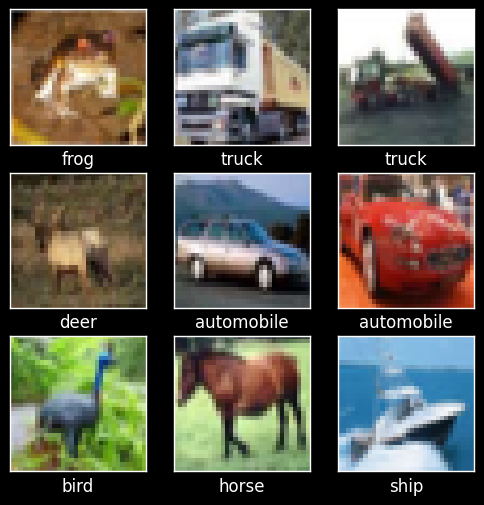

In [69]:
## visualize
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.xlabel(classes[y_train[i].item()])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
plt.show();

In [70]:
##normalize img
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [71]:
##check img
x_train[0].dtype,x_train[0].max(),x_train[0].min

(dtype('float32'), 1.0, <function ndarray.min>)

In [72]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [73]:
y_train=to_categorical(y_train,NUM_CLASSES)
y_test=to_categorical(y_test,NUM_CLASSES)
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

model building


In [74]:
model=Sequential()

In [75]:
## add conv layer
model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding='same',
    activation='relu',
    input_shape=(32, 32, 3)
))

model.add(
    MaxPool2D(
        pool_size=(2, 2),
        padding='same',
        )
)

In [76]:
##add 2nd conv layer
model.add(Conv2D(32, (3, 3),activation='relu',padding='same'))

##another pooling layer
model.add(MaxPool2D(2, 2))

In [77]:
##add 3rd conv layer
model.add(Conv2D(64,(3, 3),activation='relu',padding='same'))

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
Total params: 28640 (111.88 KB)
Trainable params: 2864

In [79]:
#flatten the o/p
model.add(Flatten())

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 4096)             

In [81]:
model.layers

In [82]:
model.layers[-1].output.shape

TensorShape([None, 4096])

In [83]:
##add dense layer
model.add(Dense(256, activation='relu'))

##output layer
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [84]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 flatten_3 (Flatten)         (None, 4096)             

In [85]:
optimizer=Adam(learning_rate=0.01)

In [86]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Training the data


In [87]:
NUM_EPOCHS = 50
BATCH_SIZE = 128

In [88]:
history = model.fit(
            x_train,
            y_train,
            epochs= NUM_EPOCHS,
            batch_size= BATCH_SIZE,
            shuffle=True,
            validation_data=(x_test, y_test)
)

Epoch 1/50
391/391 [==============================] - 4s 8ms/step - loss: 2.1585 - accuracy: 0.1982 - val_loss: 1.7131 - val_accuracy: 0.3684
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.6080 - accuracy: 0.4194 - val_loss: 1.5444 - val_accuracy: 0.4438
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4896 - accuracy: 0.4626 - val_loss: 1.4747 - val_accuracy: 0.4653
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4234 - accuracy: 0.4881 - val_loss: 1.4505 - val_accuracy: 0.4743
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3877 - accuracy: 0.5026 - val_loss: 1.4219 - val_accuracy: 0.4803
Epoch 6/50
391/391 [==============================] - 3s 6ms/step - loss: 1.3562 - accuracy: 0.5136 - val_loss: 1.4224 - val_accuracy: 0.4854
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 1.3183 - accuracy: 0.5300 - val_loss: 1.4418 - val_accuracy: 0.4861
Epoch 

In [89]:
## function to plot loss and accuracy
def plot_history(history):
  fig = plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy of Model')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.grid(False)
  plt.legend(['train','test'],loc='lower right')
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('loss of Model')
  plt.xlabel('Epochs')
  plt.ylabel('loss')
  plt.grid(False)
  plt.legend(['train','test'],loc='upper right')
  plt.tight_layout()
  fig.show();


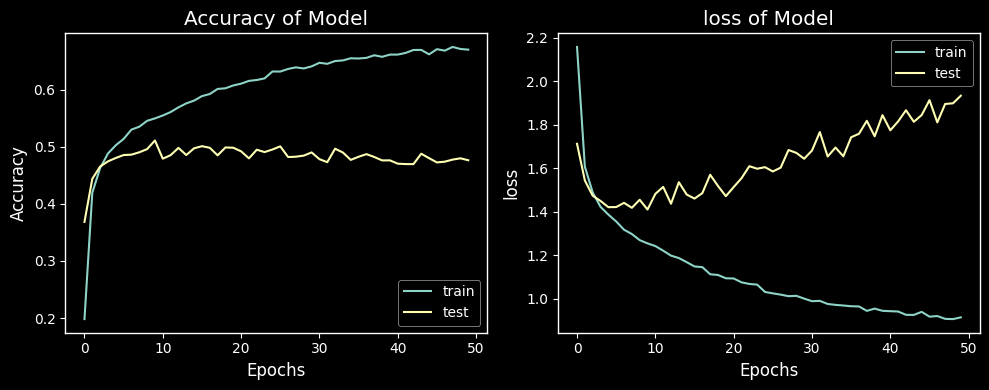

In [90]:
plot_history(history)

improving the model


In [91]:
model2 =Sequential()

In [92]:
# first layers
model2.add (Conv2D(32,(3,3), padding= 'same',activation= 'relu',input_shape= (32,32,3)))
model2.add(MaxPool2D((2,2)))

In [93]:
#layer 2
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D((2,2)))
#add dropout
model2.add(Dropout(0.3))

In [94]:
#layer 3
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(MaxPool2D((2,2)))
model2.add(Dropout(0.3))

In [95]:
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(NUM_CLASSES,activation='softmax'))

In [96]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)         

In [97]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [98]:
def simple_decay(epoch,lr):
  if epoch<30:
    lrate=lr
  elif epoch<60:
    lrate = 0.0005
  else:
    lrate=0.0001
  return lrate

In [99]:
#create schduler
scheduler = LearningRateScheduler(simple_decay)

In [100]:
callbacks = [scheduler]

In [101]:
optimizer = Adam(learning_rate=0.001)

In [102]:
model2.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history2 = model2.fit(
    x_train,
    y_train,
    epochs=100,
    shuffle=True,
    validation_data=(x_test, y_test),
    callbacks=callbacks
   )

Epoch 1/100
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5741 - accuracy: 0.4232 - val_loss: 1.1987 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1959 - accuracy: 0.5722 - val_loss: 1.0465 - val_accuracy: 0.6260 - lr: 0.0010
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0503 - accuracy: 0.6273 - val_loss: 0.9317 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 4/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9657 - accuracy: 0.6587 - val_loss: 0.8589 - val_accuracy: 0.7001 - lr: 0.0010
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9139 - accuracy: 0.6786 - val_loss: 0.8350 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8633 - accuracy: 0.6961 - val_loss: 0.8194 - val_accuracy: 0.7127 - lr: 0.0010
Epoch 7/100
1563/1563 [============================

In [ ]:
plot_history(history2)

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [ ]:
dir(imdb)

In [ ]:
(x_train, y_train),(x_test,y_test)=imdb.load_data()

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [ ]:
print(x_train[0])

In [ ]:
print(y_train[0])

In [ ]:
set(y_train)

In [ ]:
len (np.unique(np.hstack(x_train)))

In [ ]:
len(np.unique(np.hstack(x_test)))

In [ ]:
indices=imdb.get_word_index()
indices